In [220]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **1. Loading Dataset**

In [221]:
# Loading the data
new_data = pd.read_csv("/kaggle/input/seperated-data/Australia_Newcastle.csv")

# print the shape
print(new_data.shape)

#runs the first 5 rows
new_data.head()

(2769, 12)


,Date,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
0,2014-12-29,NaN,4.7,15.2,9.0,12.0,2.9,NaN,NaN,NaN,NaN,Australia_Newcastle
1,2014-12-30,3.4,4.7,19.2,21.0,23.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
2,2014-12-31,2.3,2.8,17.6,38.0,39.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
3,2015-01-01,2.3,1.9,16.8,24.0,38.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
4,2015-01-02,NaN,3.8,10.4,24.0,42.0,2.9,NaN,NaN,NaN,NaN,Australia_Newcastle


In [222]:
# Find the minimum and maximum dates
min_date = new_data['Date'].min()
max_date = new_data['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2014-12-29
Maximum date: 2025-01-09


In [223]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2769 non-null   object 
 1   co            858 non-null    float64
 2   no2           2769 non-null   float64
 3   o3            1067 non-null   float64
 4   pm10          2769 non-null   float64
 5   pm25          2768 non-null   float64
 6   so2           2760 non-null   float64
 7   humidity      2053 non-null   float64
 8   pressure      2053 non-null   float64
 9   temperature   2053 non-null   float64
 10  wind-speed    1971 non-null   float64
 11  Country_City  2769 non-null   object 
dtypes: float64(10), object(2)
memory usage: 259.7+ KB


In [224]:
new_data.describe()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
count,858.000000,2769.000000,1067.000000,2769.000000,2768.000000,2760.000000,2053.000000,2053.000000,2053.000000,1971.000000
mean,3.138695,6.514121,13.619213,18.044059,26.636199,2.290507,76.125037,1017.074963,18.027667,3.545358
std,1.590218,3.673895,5.315606,7.945911,14.282966,1.146280,12.383626,6.779257,4.160502,1.683754
min,1.200000,1.000000,0.800000,4.000000,8.000000,1.500000,27.000000,993.700000,8.200000,0.300000
25%,2.300000,3.800000,10.400000,13.000000,17.000000,1.500000,69.600000,1012.400000,14.400000,2.500000
50%,3.400000,5.600000,13.600000,17.000000,23.000000,1.500000,78.200000,1017.000000,18.200000,3.100000
75%,3.400000,9.300000,16.800000,21.000000,32.000000,2.900000,85.100000,1022.000000,21.200000,4.300000
max,16.700000,22.300000,41.600000,87.000000,172.000000,17.200000,98.000000,1035.900000,32.000000,13.000000


In [225]:
# Investigate all the elements whithin each Feature

for column in new_data:
    # Handle numerical and string columns differently
    if new_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = new_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(new_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :2767
The number of values for feature co :11 -- [ 1.2  2.3  3.4  4.5  5.6  6.7  7.8  8.9 11.2 16.7  nan]
The number of values for feature no2 :22
The number of values for feature o3 :40
The number of values for feature pm10 :61
The number of values for feature pm25 :81
The number of values for feature so2 :9 -- [ 1.5  2.9  4.3  5.8  7.2  8.6 10.  17.2  nan]
The number of values for feature humidity :477
The number of values for feature pressure :323
The number of values for feature temperature :189
The number of values for feature wind-speed :105
The number of values for feature Country_City :1 -- ['Australia_Newcastle']


In [226]:
new_data.isna().sum()

Date               0
co              1911
no2                0
o3              1702
pm10               0
pm25               1
so2                9
humidity         716
pressure         716
temperature      716
wind-speed       798
Country_City       0
dtype: int64

# **1.2 - Function**

In [227]:
print(os.listdir('/kaggle/usr/lib/function'))

['__script__.py', '__results__.html', '__script__.ipynb', 'function.py', '__output__.json', 'custom.css']


In [228]:
import sys
sys.path.append("/kaggle/usr/lib/function")  # Add directory to the path

import function as fn

In [229]:
# Use the functions
new_data1 = fn.prepare_datetime_index(new_data, date_column='Date')
new_data1.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
Date,,,,,,,,,,,
2014-12-29,NaN,4.7,15.2,9.0,12.0,2.9,NaN,NaN,NaN,NaN,Australia_Newcastle
2014-12-30,3.4,4.7,19.2,21.0,23.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
2014-12-31,2.3,2.8,17.6,38.0,39.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
2015-01-01,2.3,1.9,16.8,24.0,38.0,1.5,NaN,NaN,NaN,NaN,Australia_Newcastle
2015-01-02,NaN,3.8,10.4,24.0,42.0,2.9,NaN,NaN,NaN,NaN,Australia_Newcastle


In [230]:
# Use the functions
new_data2 = fn.fill_pollutant_values(new_data1)
print(new_data2.isna().sum())

co              0
no2             0
o3              0
pm10            0
pm25            0
so2             0
humidity        0
pressure        0
temperature     0
wind-speed      0
Country_City    0
dtype: int64


**Check**

In [231]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data2.index.min(), end=new_data2.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data2.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2015-01-18', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=898, freq=None)


In [232]:
new_data3 = fn.impute_missing_dates(new_data2)

In [233]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data3.index.min(), end=new_data3.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data3.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [234]:
duplicates = new_data3.index[new_data3.index.duplicated()]
print(f"Duplicate indexes: {duplicates}")

Duplicate indexes: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


# **1.3.Normal AQI count, After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling), (Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi).**

In [235]:
new_data4 = fn.calculate_aqi(new_data3, subindex_columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])

In [236]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,42.0


In [237]:
new_data4.shape

(3665, 13)

 After Normal AQI count Smoothing AQI(IQR, Z-score, Rolling)

In [238]:
# Apply the outlier handling function to the 'AQI' column only
new_data4['AQI_smoothed_iqr'] = fn.handle_aqi_outliers(new_data4['AQI'], method='iqr')
new_data4['AQI_smoothed_zscore'] = fn.handle_aqi_outliers(new_data4['AQI'], method='zscore')
new_data4['AQI_smoothed_rolling'] = fn.handle_aqi_outliers(new_data4['AQI'], method='rolling')

In [239]:
new_data4.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,15.0,15.0,15.0,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,23.0,23.0,23.0,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,39.0,39.0,39.0,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,38.0,38.0,38.0,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,42.0,42.0,42.0,42.0


(Preprocess Pollution --> Smooth Pollution --> Calculate smooth aqi)

In [240]:
new_smooth = fn.calculate_smooth_aqi(new_data3, columns=['co', 'no2', 'o3', 'pm10', 'pm25', 'so2'])
new_smooth.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,AQI_Smooth
2014-12-29,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2014-12-30,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2014-12-31,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2015-01-01,2.920940,3.616667,15.333333,22.666667,32.000000,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,32.000000
2015-01-02,2.964491,3.466667,14.816667,24.000000,34.166667,1.966667,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,34.166667


**AQI (normal, smooth_iqr, smooth_zscore, smooth_rolling, smooth)**

<Axes: >

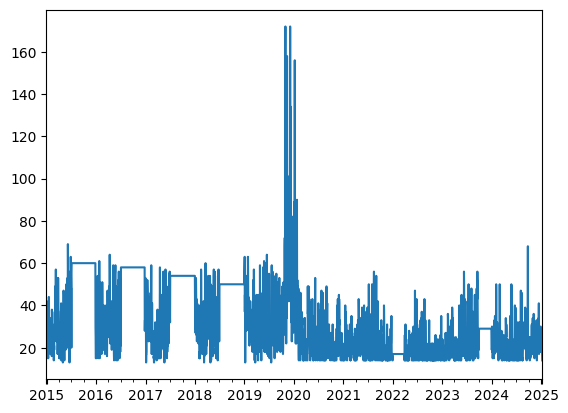

In [241]:
#normal
aqi_normal = new_data4['AQI']
aqi_normal.plot()

<Axes: >

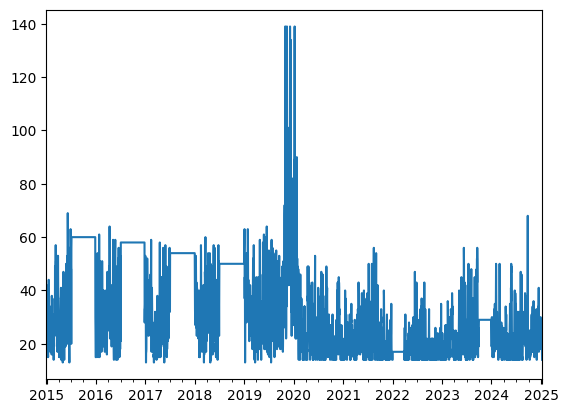

In [242]:
#smooth_iqr
aqi_smooth_iqr = new_data4['AQI_smoothed_iqr']
aqi_smooth_iqr.plot()

<Axes: >

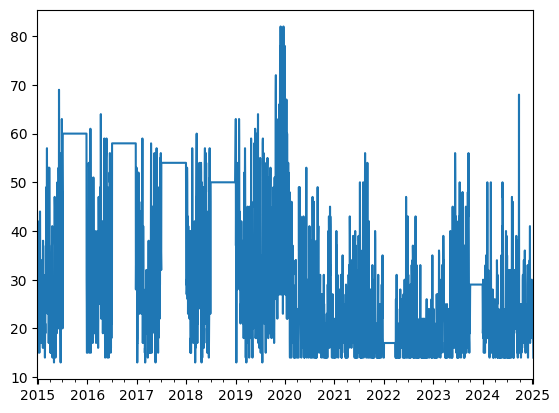

In [243]:
#smooth_zscore
aqi_smooth_zscore = new_data4['AQI_smoothed_zscore']
aqi_smooth_zscore.plot()

<Axes: >

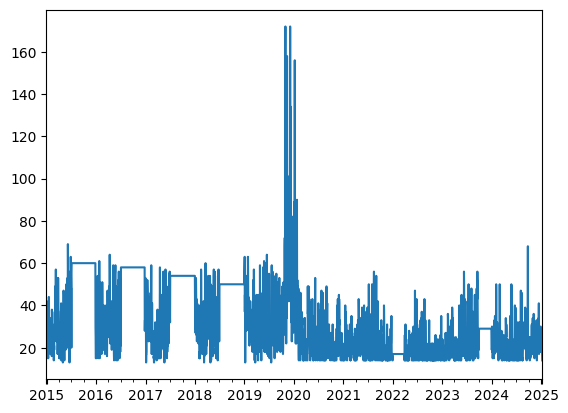

In [244]:
#smooth_rolling
aqi_smooth_rolling = new_data4['AQI_smoothed_rolling']
aqi_smooth_rolling.plot()

<Axes: >

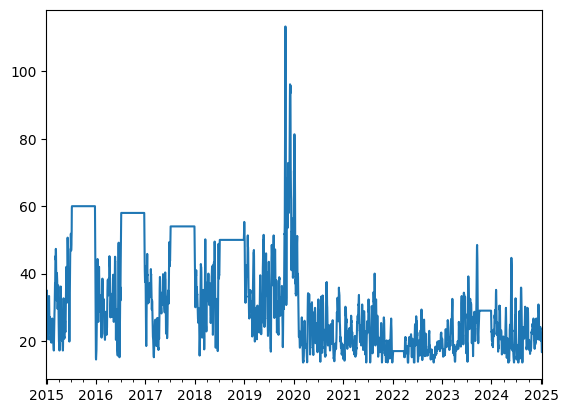

In [245]:
#smooth
aqi_smooth = new_smooth['AQI_Smooth']
aqi_smooth.plot()

# **2.1. Splitting & Preprocessing the Raw Data(Normal AQI)**

Normal AQI

In [246]:
new_data4.head(8)

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City,Checks,AQI,AQI_smoothed_iqr,AQI_smoothed_zscore,AQI_smoothed_rolling
2014-12-29,3.138695,4.7,15.2,9.0,12.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,15.0,15.0,15.0,15.0
2014-12-30,3.400000,4.7,19.2,21.0,23.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,23.0,23.0,23.0,23.0
2014-12-31,2.300000,2.8,17.6,38.0,39.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,39.0,39.0,39.0,39.0
2015-01-01,2.300000,1.9,16.8,24.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,38.0,38.0,38.0,38.0
2015-01-02,3.138695,3.8,10.4,24.0,42.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,42.0,42.0,42.0,42.0
2015-01-03,3.138695,3.8,12.8,20.0,38.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,38.0,38.0,38.0,38.0
2015-01-04,3.400000,3.8,12.1,17.0,25.0,2.9,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,25.0,25.0,25.0,25.0
2015-01-05,2.300000,2.8,14.5,22.0,28.0,1.5,76.126377,1017.086884,18.027986,3.545607,Australia_Newcastle,6,28.0,28.0,28.0,28.0


In [247]:
new_data4.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City', 'Checks', 'AQI',
       'AQI_smoothed_iqr', 'AQI_smoothed_zscore', 'AQI_smoothed_rolling'],
      dtype='object')

***Working with Normal AQI***

In [248]:
aqi_normal

2014-12-29    15.0
2014-12-30    23.0
2014-12-31    39.0
2015-01-01    38.0
2015-01-02    42.0
              ... 
2025-01-05    21.0
2025-01-06    23.0
2025-01-07    19.0
2025-01-08    14.0
2025-01-09    14.0
Freq: D, Name: AQI, Length: 3665, dtype: float64

In [249]:
# # Initialize the MinMaxScaler
# scaler = StandardScaler()

# # Apply MinMax scaling to 'aqi_normal'
# aqi_normal['aqi_normal_scaled'] = scaler.fit_transform(aqi_normal[['AQI']])

# function to define window_size, converting data into numpy array, 
# two types of array X-feature and y-label

# def new_data_to_X_y(new_data, window_size=6):
#   new_data_as_np = new_data.to_numpy()
#   X = []
#   y = []
#   for i in range(len(new_data_as_np)-window_size):
#     row = [[a] for a in new_data_as_np[i:i+window_size]]
#     X.append(row)
#     label = new_data_as_np[i+window_size]
#     y.append(label)
#   return np.array(X), np.array(y)

# train,validation, and test split

# X_train1, y_train1 = X1[:2200], y1[:2200]
# X_val1, y_val1 = X1[2200:3000], y1[2200:3000]
# X_test1, y_test1 = X1[3000:], y1[3000:]
# X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

In [250]:
# Function to define window_size and convert data into X (features) and y (labels)
def new_data_to_X_y(new_data, window_size, train_pct, val_pct, test_pct):
    # Convert data to numpy array
    new_data_as_np = new_data.to_numpy()
    
    # Split data based on percentages
    total_len = len(new_data_as_np)
    train_end = int(train_pct * total_len)
    val_end = train_end + int(val_pct * total_len)
    
    # Prepare train, val, and test splits
    train_data = new_data_as_np[:train_end]
    val_data = new_data_as_np[train_end:val_end]
    test_data = new_data_as_np[val_end:]
    
    # Helper function to create X and y
    def create_X_y(data):
        X, y = [], []
        for i in range(len(data) - window_size):
            row = [[a] for a in data[i:i + window_size]]
            X.append(row)
            label = data[i + window_size]
            y.append(label)
        return np.array(X), np.array(y)
    
    # Create X and y for train, validation, and test
    X_train, y_train = create_X_y(train_data)
    X_val, y_val = create_X_y(val_data)
    X_test, y_test = create_X_y(test_data)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [251]:
#passing data to function

# WINDOW_SIZE = 6
# train_pct=0.7
# val_pct=0.2
# test_pct=0.1
(X_train1, y_train1), (X_val1, y_val1), (X_test1, y_test1) = new_data_to_X_y(aqi_normal, 6, 0.7, 0.2, 0.1)

# shapes
print("Train shapes:", X_train1.shape, y_train1.shape)
print("Validation shapes:", X_val1.shape, y_val1.shape)
print("Test shapes:", X_test1.shape, y_test1.shape)

Train shapes: (2559, 6, 1) (2559,)
Validation shapes: (727, 6, 1) (727,)
Test shapes: (361, 6, 1) (361,)


# **2.2. Model Training & Testing**

In [252]:
# libraries for building model and testing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# LSTM-32-8(normal)

In [253]:
model1 = Sequential()
model1.add(InputLayer((6, 1))) # 6 timestamp , 1 feature
model1.add(LSTM(32)) # LSTM layer with 16 units
model1.add(Dense(8, activation='relu')) # activation function- ReLU with 8 dense layer

model1.add(Dense(1, 'linear')) # output - linear and data- 1

model1.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,625 (18.07 KB)

 Trainable params: 4,625 (18.07 KB)

 Non-trainable params: 0 (0.00 B)

In [254]:
cp1 = ModelCheckpoint('/kaggle/working/model1.keras', save_best_only=True)

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[RootMeanSquaredError()])

In [255]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp1])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1633.3619 - root_mean_squared_error: 40.4109 - val_loss: 407.2061 - val_root_mean_squared_error: 20.1793
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1390.8243 - root_mean_squared_error: 37.2846 - val_loss: 193.6525 - val_root_mean_squared_error: 13.9159
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 995.0797 - root_mean_squared_error: 31.5090 - val_loss: 71.0269 - val_root_mean_squared_error: 8.4277
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 618.3145 - root_mean_squared_error: 24.8535 - val_loss: 62.7791 - val_root_mean_squared_error: 7.9233
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 437.6165 - root_mean_squared_error: 20.9098 - val_loss: 95.7243 - val_root_mean_squared_error: 9.7839
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 323.2977 - root_mean_squared_error: 17.9698 - val_loss: 82.7125 - val_root_mean_squared_error: 9.0946
Epoch 7/100
80/80 ━━━━━━━━━━

In [256]:
from tensorflow.keras.models import load_model
model1 = load_model('/kaggle/working/model1.keras')

In [257]:
# Evaluate the model on the train data
train_result = model1.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 5.5822
Mean Squared Error (MSE): 90.6267
Root Mean Squared Error (RMSE): 9.5198
R-squared (Accuracy): 0.7091


In [258]:
# Evaluate the model on the validation data
val_result = model1.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 4.0778
Mean Squared Error (MSE): 33.2909
Root Mean Squared Error (RMSE): 5.7698
R-squared (Accuracy): 0.4000


In [259]:
# Evaluate the model on the test data
test_result = model1.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 4.7508
Mean Squared Error (MSE): 42.5212
Root Mean Squared Error (RMSE): 6.5208
R-squared (Accuracy): 0.3345


In [260]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,33.091309,25.0
1,25.088688,28.0
2,29.938877,27.0
3,27.928394,17.0
4,20.626415,22.0
...,...,...
2554,16.744160,14.0
2555,16.730316,17.0
2556,19.467480,17.0
2557,19.234238,17.0


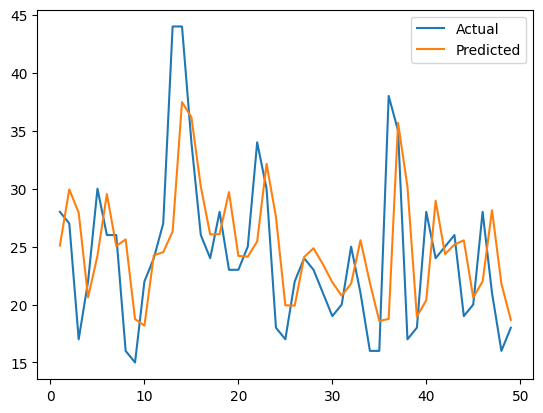

In [261]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [262]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,19.326607,17.0
1,19.326607,17.0
2,19.326607,17.0
3,19.326607,17.0
4,19.326607,17.0
...,...,...
722,22.274742,30.0
723,29.955864,18.0
724,20.021259,18.0
725,20.152515,26.0


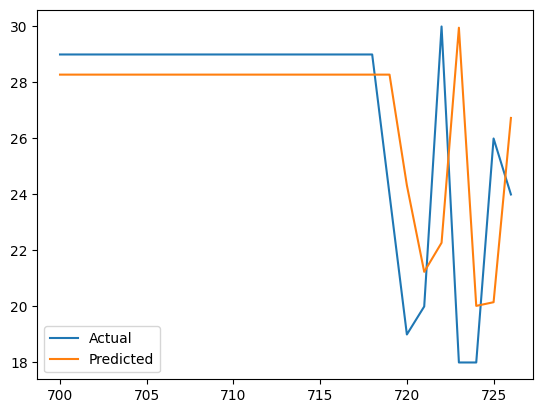

In [263]:
plt.plot(val_results['Actuals'][700:], label='Actual')
plt.plot(val_results['Train Predictions'][700:], label='Predicted')
plt.legend()
plt.show()

In [264]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,19.685413,29.0
1,28.685257,30.0
2,27.798389,20.0
3,20.884914,15.0
4,18.127220,20.0
...,...,...
356,20.015087,21.0
357,22.685757,23.0
358,23.808861,19.0
359,20.700500,14.0


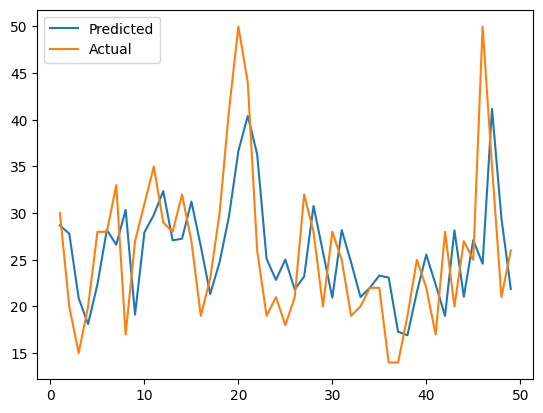

In [265]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

GRU(Normal)

In [266]:
model2 = Sequential()
model2.add(InputLayer((6, 1)))
model2.add(GRU(32))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                          │ (None, 32)                  │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,633 (14.19 KB)

 Trainable params: 3,633 (14.19 KB)

 Non-trainable params: 0 (0.00 B)

In [267]:
cp2 = ModelCheckpoint('/kaggle/working/model2.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[RootMeanSquaredError()])

In [268]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), 
           epochs=100, callbacks=[cp2])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1703.5250 - root_mean_squared_error: 41.2705 - val_loss: 427.1335 - val_root_mean_squared_error: 20.6672
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1512.7399 - root_mean_squared_error: 38.8643 - val_loss: 276.1498 - val_root_mean_squared_error: 16.6178
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1184.5527 - root_mean_squared_error: 34.4112 - val_loss: 174.2317 - val_root_mean_squared_error: 13.1997
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 890.4534 - root_mean_squared_error: 29.8291 - val_loss: 98.0854 - val_root_mean_squared_error: 9.9038
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 743.5662 - root_mean_squared_error: 27.2626 - val_loss: 57.8974 - val_root_mean_squared_error: 7.6090
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 614.1984 - root_mean_squared_error: 24.7449 - val_loss: 63.2542 - val_root_mean_squared_error: 7.9533
Epoch 7/100
80/80 ━━━━━━━

In [269]:
from tensorflow.keras.models import load_model
model2 = load_model('/kaggle/working/model2.keras')

In [270]:
# Evaluate the model on the train data
train_result = model2.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 5.5674
Mean Squared Error (MSE): 87.5479
Root Mean Squared Error (RMSE): 9.3567
R-squared (Accuracy): 0.7190


In [271]:
# Evaluate the model on the validation data
val_result = model2.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 3.9565
Mean Squared Error (MSE): 33.2964
Root Mean Squared Error (RMSE): 5.7703
R-squared (Accuracy): 0.3999


In [272]:
# Evaluate the model on the test data
test_result = model2.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 4.7094
Mean Squared Error (MSE): 43.1402
Root Mean Squared Error (RMSE): 6.5681
R-squared (Accuracy): 0.3248


In [273]:
train_predictions = model2.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,34.228069,25.0
1,24.706623,28.0
2,31.418619,27.0
3,29.287273,17.0
4,19.432663,22.0
...,...,...
2554,16.109108,14.0
2555,16.122435,17.0
2556,19.069275,17.0
2557,18.488232,17.0


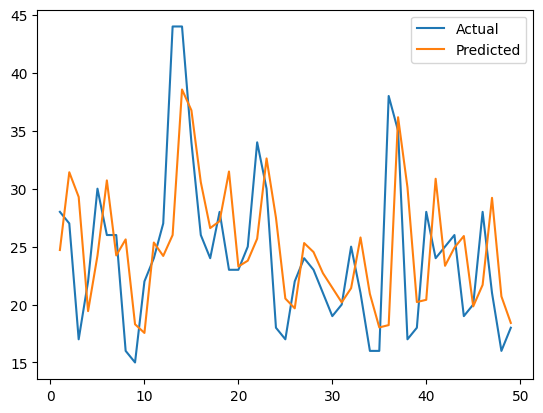

In [274]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [275]:
val_predictions = model2.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,18.610441,17.0
1,18.610441,17.0
2,18.610441,17.0
3,18.610441,17.0
4,18.610441,17.0
...,...,...
722,22.130459,30.0
723,30.917299,18.0
724,19.007689,18.0
725,19.909189,26.0


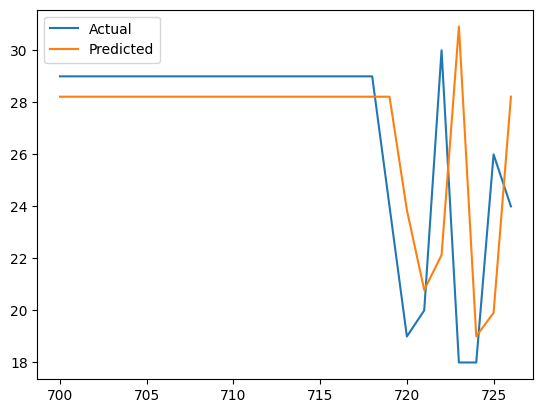

In [276]:
plt.plot(val_results['Actuals'][700:], label='Actual')
plt.plot(val_results['Train Predictions'][700:], label='Predicted')
plt.legend()
plt.show()

In [277]:
test_predictions = model2.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,18.632040,29.0
1,29.513636,30.0
2,28.017399,20.0
3,20.562613,15.0
4,18.068567,20.0
...,...,...
356,19.453657,21.0
357,22.844339,23.0
358,23.561403,19.0
359,19.697754,14.0


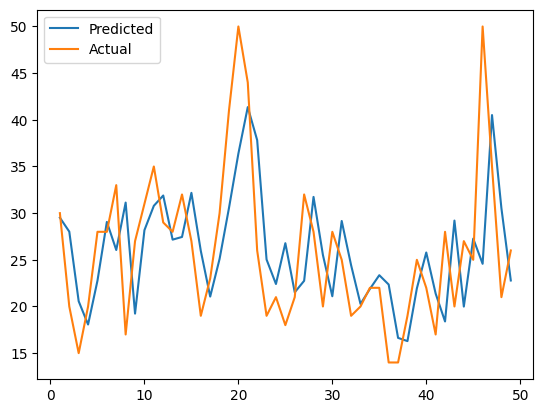

In [278]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

# RNN(Normal)

In [279]:
model3 = Sequential()
model3.add(InputLayer((6, 1)))
model3.add(SimpleRNN(32))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,361 (5.32 KB)

 Trainable params: 1,361 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

In [280]:
cp3 = ModelCheckpoint('/kaggle/working/model3.keras', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[RootMeanSquaredError()])

In [281]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), 
           epochs=100, callbacks=[cp3])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1614.2626 - root_mean_squared_error: 40.1704 - val_loss: 464.8062 - val_root_mean_squared_error: 21.5594
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1521.4279 - root_mean_squared_error: 38.9966 - val_loss: 328.4314 - val_root_mean_squared_error: 18.1227
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1298.4489 - root_mean_squared_error: 36.0246 - val_loss: 213.2932 - val_root_mean_squared_error: 14.6046
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 987.6776 - root_mean_squared_error: 31.4234 - val_loss: 124.7547 - val_root_mean_squared_error: 11.1694
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 823.7213 - root_mean_squared_error: 28.6499 - val_loss: 69.0818 - val_root_mean_squared_error: 8.3115
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 641.1505 - root_mean_squared_error: 25.3077 - val_loss: 55.3015 - val_root_mean_squared_error: 7.4365
Epoch 7/100
80/80 ━━━━━

In [282]:
from tensorflow.keras.models import load_model
model3 = load_model('/kaggle/working/model3.keras')

In [283]:
# Evaluate the model on the train data
train_result = model3.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 5.6902
Mean Squared Error (MSE): 89.8563
Root Mean Squared Error (RMSE): 9.4793
R-squared (Accuracy): 0.7116


In [284]:
# Evaluate the model on the validation data
val_result = model3.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 3.9925
Mean Squared Error (MSE): 32.8930
Root Mean Squared Error (RMSE): 5.7352
R-squared (Accuracy): 0.4071


In [285]:
# Evaluate the model on the test data
test_result = model3.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 4.6026
Mean Squared Error (MSE): 42.2291
Root Mean Squared Error (RMSE): 6.4984
R-squared (Accuracy): 0.3391


In [286]:
train_predictions = model3.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,34.106575,25.0
1,25.428885,28.0
2,29.183264,27.0
3,27.669027,17.0
4,18.923311,22.0
...,...,...
2554,16.503939,14.0
2555,16.525394,17.0
2556,19.884108,17.0
2557,18.763739,17.0


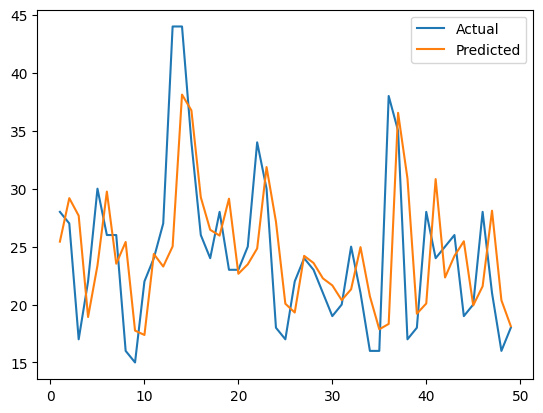

In [287]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [288]:
val_predictions = model3.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,18.856306,17.0
1,18.856306,17.0
2,18.856306,17.0
3,18.856306,17.0
4,18.856306,17.0
...,...,...
722,21.705969,30.0
723,29.842798,18.0
724,18.278353,18.0
725,20.018448,26.0


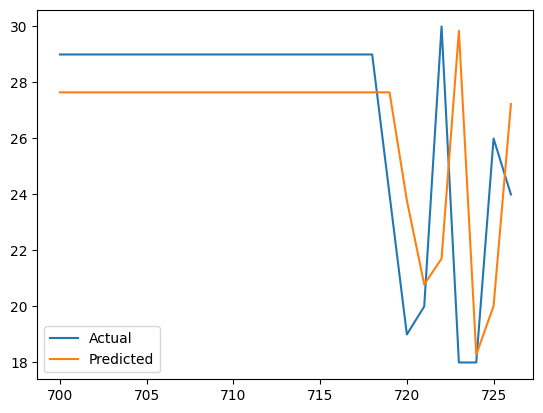

In [289]:
plt.plot(val_results['Actuals'][700:], label='Actual')
plt.plot(val_results['Train Predictions'][700:], label='Predicted')
plt.legend()
plt.show()

In [290]:
test_predictions = model3.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,18.683596,29.0
1,29.184488,30.0
2,27.813877,20.0
3,20.386045,15.0
4,17.441803,20.0
...,...,...
356,19.747038,21.0
357,22.381538,23.0
358,23.118708,19.0
359,19.580362,14.0


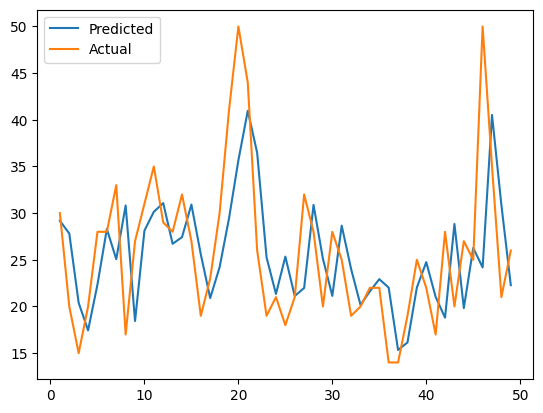

In [291]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

# CNN+GRU

In [292]:
model4 = Sequential()

# Convolutional layer
model4.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train1.shape[1], 1)))

# GRU layer
model4.add(GRU(units=16, return_sequences=False))  # Return_sequences=False for final GRU layer

# Dense layers
model4.add(Dense(8, activation='relu'))
model4.add(Dropout(0.2)) 
model4.add(Dense(1, activation='linear'))

model4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 4, 128)              │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 16)                  │           7,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,665 (29.94 KB)

 Trainable params: 7,665 (29.94 KB)

 Non-trainable params: 0 (0.00 B)

In [293]:
cp4 = ModelCheckpoint('/kaggle/working/model4.keras', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[RootMeanSquaredError()])

In [294]:
model4.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), 
           epochs=100, callbacks=[cp3])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1551.7548 - root_mean_squared_error: 39.3860 - val_loss: 373.9525 - val_root_mean_squared_error: 19.3379
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1325.3048 - root_mean_squared_error: 36.3822 - val_loss: 309.2174 - val_root_mean_squared_error: 17.5846
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1233.5565 - root_mean_squared_error: 35.1188 - val_loss: 246.2154 - val_root_mean_squared_error: 15.6913
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1089.0797 - root_mean_squared_error: 32.9961 - val_loss: 185.8775 - val_root_mean_squared_error: 13.6337
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1003.7298 - root_mean_squared_error: 31.6687 - val_loss: 133.4468 - val_root_mean_squared_error: 11.5519
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 921.1214 - root_mean_squared_error: 30.3133 - val_loss: 92.6838 - val_root_mean_squared_error: 9.6272
Epoch 7/100
80/80 ━

In [295]:
from tensorflow.keras.models import load_model
model4 = load_model('/kaggle/working/model4.keras')

In [296]:
# Evaluate the model on the train data
train_result = model4.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 5.3943
Mean Squared Error (MSE): 87.7287
Root Mean Squared Error (RMSE): 9.3664
R-squared (Accuracy): 0.7184


In [297]:
# Evaluate the model on the validation data
val_result = model4.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 4.0192
Mean Squared Error (MSE): 33.0778
Root Mean Squared Error (RMSE): 5.7513
R-squared (Accuracy): 0.4038


In [298]:
# Evaluate the model on the test data
test_result = model4.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 4.7127
Mean Squared Error (MSE): 43.8009
Root Mean Squared Error (RMSE): 6.6182
R-squared (Accuracy): 0.3145
